# Player Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [3]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 24)

In [5]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


## Taking in Consideration only KXIP VS SRH matches

In [6]:
KXIP_SRH =matches[np.logical_or(np.logical_and(matches['team1']=='Kings XI Punjab',matches['team2']=='Sunrisers Hyderabad'),
                            np.logical_and(matches['team2']=='Kings XI Punjab',matches['team1']=='Sunrisers Hyderabad'))]

In [7]:
KXIP_SRH.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
4312,19,2017,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
4313,19,2017,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
4314,19,2017,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
4315,19,2017,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,1,0,1,NaN,NaN
4316,19,2017,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,1,0,1,NaN,NaN


In [8]:
KXIP_SRH.match_id.nunique()

14

In [9]:
KXIP_SRH.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

## David Warner Strike rate and dismissal

In [10]:
warner = KXIP_SRH[(KXIP_SRH["batting_team"]=="Sunrisers Hyderabad")&(KXIP_SRH["batsman"]=="DA Warner")]

warner = warner[warner["wide_runs"]==0]

warner.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
4312,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,1,1,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
4313,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,1,2,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
4314,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,1,3,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
4315,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,1,4,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,0,1,0,1,NaN,NaN
4317,Kings XI Punjab,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Kings XI Punjab,1,6,DA Warner,S Dhawan,Sandeep Sharma,0,0,1,0,0,1,1,NaN,NaN


In [11]:
warner.match_id.nunique()

10

In [12]:
warner.season.unique()

array([2017, 2014, 2015, 2016, 2019], dtype=int64)

In [13]:
strike_rate = warner.groupby(["match_id","batsman"]).agg({ "batsman_runs":"sum","ball" : 'count'})

print("Runs scored by Warner against KXIP :")

strike_rate

Runs scored by Warner against KXIP :


,,batsman_runs,ball
match_id,batsman,,
19,DA Warner,70,54
32,DA Warner,51,27
466,DA Warner,8,12
496,DA Warner,44,23
544,DA Warner,58,41
564,DA Warner,81,52
594,DA Warner,59,31
622,DA Warner,52,41
11313,DA Warner,73,62


In [14]:
strike_rate["strike rate"] = pd.DataFrame((strike_rate['batsman_runs']/strike_rate["ball"]) * 100)

print("Strike Rate of Warner while batting :")

strike_rate

Strike Rate of Warner while batting :


,,batsman_runs,ball,strike rate
match_id,batsman,,,
19,DA Warner,70,54,129.629630
32,DA Warner,51,27,188.888889
466,DA Warner,8,12,66.666667
496,DA Warner,44,23,191.304348
544,DA Warner,58,41,141.463415
564,DA Warner,81,52,155.769231
594,DA Warner,59,31,190.322581
622,DA Warner,52,41,126.829268
11313,DA Warner,73,62,117.741935


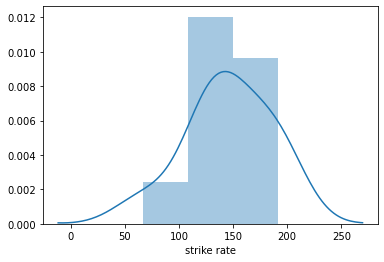

In [15]:
sns.distplot(strike_rate['strike rate'])

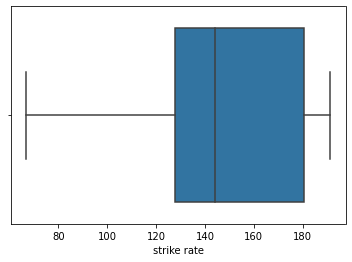

In [16]:
 sns.boxplot(strike_rate['strike rate'])

In [17]:
print("On an average strike rate of Warner against KXIP :",round(strike_rate['strike rate'].mean()))

On an average strike rate of Warner against KXIP : 146


## Confidence Interval

In [18]:
strike_rate.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
strike rate,10.0,145.504453,39.01279,66.666667,127.529359,143.945993,180.608974,191.304348


In [19]:
mean = strike_rate['strike rate'].mean()
sd = strike_rate['strike rate'].std()
n = len(strike_rate['strike rate'])

n

10

In [20]:
tstar = 2.064
se = sd/np.sqrt(n)
se

12.336927553468755

In [21]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the strike rate with which Warner can score against KXIP in this match  :{}".format((lcb, ucb)))

95% Confidence Interval for the strike rate with which Warner can score against KXIP in this match  :(120.0, 171.0)


- Dismissal

In [22]:
warner_dismiss = warner[warner["player_dismissed"]=="DA Warner"]

In [23]:
count = warner.match_id.nunique()

In [24]:
dismiss = pd.DataFrame(warner_dismiss.groupby(["match_id","batsman","dismissal_kind"])["dismissal_kind"].count())

total = dismiss["dismissal_kind"].sum()

dismiss

,,,dismissal_kind
match_id,batsman,dismissal_kind,
32,DA Warner,bowled,1
466,DA Warner,caught,1
496,DA Warner,run out,1
544,DA Warner,caught,1
564,DA Warner,caught,1
594,DA Warner,caught,1
622,DA Warner,hit wicket,1
11339,DA Warner,caught,1


In [25]:
warner_dismissal_percent = total/count

print("Out of last {} matches Warner has been dismissed in {} innings".format(count , total))
print("Dismissal percentage of Warner getting out is {}%".format(round(warner_dismissal_percent *100)))

Out of last 10 matches Warner has been dismissed in 8 innings
Dismissal percentage of Warner getting out is 80.0%


From all the above analysis of performance of Warner against KXIP we can predict that Warner is expected to score with a strike rate of 125+ and is expected to get out during the SRH's batting.

## KL Rahul contribution

- Against SRH

In [26]:
punjab = KXIP_SRH[KXIP_SRH["batting_team"]=='Kings XI Punjab']

In [27]:
total_runs =pd.DataFrame(punjab.groupby(["match_id"])["total_runs"].sum())

total_runs.reset_index(level=0, inplace=True)

total_runs

,match_id,total_runs
0,19,154
1,32,181
2,405,123
3,440,120
4,466,193
5,496,211
6,544,130
7,564,180
8,594,143
9,622,179


In [28]:
rahul = punjab[punjab["batsman"]=="KL Rahul"]
rahul = rahul[rahul["wide_runs"]==0]

In [29]:
rahul_score = pd.DataFrame(rahul.groupby(["match_id"])["batsman_runs"].sum())

rahul_score.columns = ["Rahul's runs"]

rahul_score.reset_index(level=0, inplace=True)

rahul_score

,match_id,Rahul's runs
0,7909,18
1,7918,32
2,11313,71
3,11339,80


In [30]:
final = pd.merge(rahul_score, total_runs, on='match_id', how='inner')

final

,match_id,Rahul's runs,total_runs
0,7909,18,201
1,7918,32,121
2,11313,71,152
3,11339,80,174


In [31]:
final["contribution"] = round((final["Rahul's runs"]/final["total_runs"]) * 100)

final

,match_id,Rahul's runs,total_runs,contribution
0,7909,18,201,9.0
1,7918,32,121,26.0
2,11313,71,152,47.0
3,11339,80,174,46.0


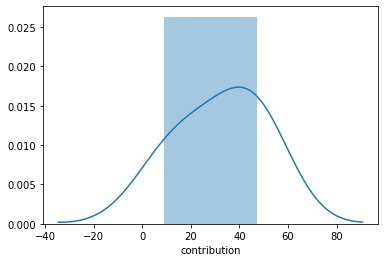

In [32]:
sns.distplot(final["contribution"])

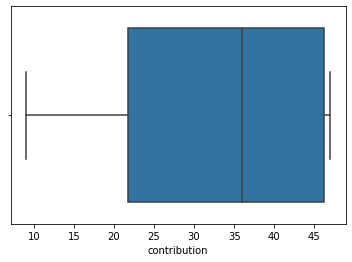

In [33]:
sns.boxplot(final["contribution"])

In [34]:
print("Average contribution of Rahul in KXIP's inning against SRH :{}%".format(round(final["contribution"].mean())))

Average contribution of Rahul in KXIP's inning against SRH :32%


- Recent (Overall)

In [35]:
punjab_overall = matches[matches["batting_team"]=='Kings XI Punjab']
cond1 = punjab_overall["season"] == 2018
cond2 = punjab_overall["season"] == 2019
recent_overall = punjab_overall[cond1 | cond2]
recent_overall.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
150830,7895,2018,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,2,Kings XI Punjab,Delhi Daredevils,...,TA Boult,0,0,0,0,0,0,0,NaN,NaN
150831,7895,2018,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,2,Kings XI Punjab,Delhi Daredevils,...,TA Boult,0,0,0,0,2,0,2,NaN,NaN
150832,7895,2018,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,2,Kings XI Punjab,Delhi Daredevils,...,TA Boult,0,0,0,0,0,0,0,NaN,NaN
150833,7895,2018,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,2,Kings XI Punjab,Delhi Daredevils,...,TA Boult,0,0,0,0,6,0,6,NaN,NaN
150834,7895,2018,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,2,Kings XI Punjab,Delhi Daredevils,...,TA Boult,0,0,0,0,4,0,4,NaN,NaN


In [36]:
total_runs_overall =pd.DataFrame(punjab_overall.groupby(["match_id"])["total_runs"].sum())

total_runs_overall.reset_index(level=0, inplace=True)

total_runs_overall

,match_id,total_runs
0,4,164
1,8,150
2,11,170
3,15,137
4,19,154
...,...,...
171,11328,168
172,11333,190
173,11339,174
174,11343,186


In [37]:
rahul_overall = recent_overall[recent_overall["batsman"]=="KL Rahul"]
rahul_overall = rahul_overall[rahul_overall["wide_runs"]==0]

In [38]:
rahul_score_overall = pd.DataFrame(rahul_overall.groupby(["match_id"])["batsman_runs"].sum())

rahul_score_overall.columns = ["Rahul's runs"]

rahul_score_overall.reset_index(level=0, inplace=True)

rahul_score_overall

,match_id,Rahul's runs
0,7895,51
1,7901,48
2,7905,37
3,7909,18
4,7911,60
5,7915,23
6,7918,32
7,7927,24
8,7931,84
9,7933,101


In [39]:
final_overall = pd.merge(total_runs_overall,rahul_score_overall , on='match_id', how='inner')

final_overall

,match_id,total_runs,Rahul's runs
0,7895,168,51
1,7901,161,48
2,7905,198,37
3,7909,201,18
4,7911,128,60
5,7915,157,23
6,7918,121,32
7,7927,184,24
8,7931,158,84
9,7933,149,101


In [40]:
final_overall["contribution"] = round((final_overall["Rahul's runs"]/final_overall["total_runs"]) * 100)

final_overall

,match_id,total_runs,Rahul's runs,contribution
0,7895,168,51,30.0
1,7901,161,48,30.0
2,7905,198,37,19.0
3,7909,201,18,9.0
4,7911,128,60,47.0
5,7915,157,23,15.0
6,7918,121,32,26.0
7,7927,184,24,13.0
8,7931,158,84,53.0
9,7933,149,101,68.0


In [41]:
final_overall.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
contribution,28.0,27.035714,18.534217,1.0,9.75,27.0,41.5,68.0


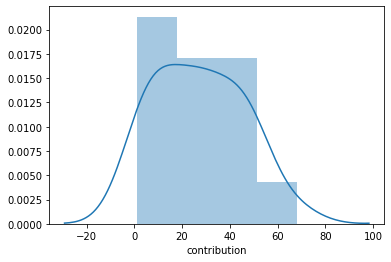

In [42]:
sns.distplot(final_overall["contribution"])

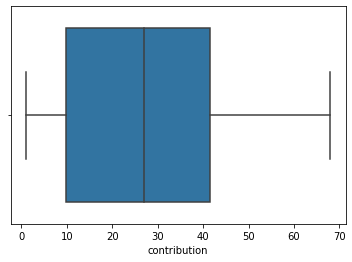

In [43]:
sns.boxplot(final_overall["contribution"])

In [44]:
print("Average contribution of Rahul in KXIP's inning overall in recent years :{}%".format(round(final_overall["contribution"].mean())))

Average contribution of Rahul in KXIP's inning overall in recent years :27%


Based on all the above analysis related to Rahul's contribution against SRH and overall also, we can predict KL Rahul to have 23%+ contribution in KXIP's inning  

## Balls SRH would take for 50 runs

In [45]:
sun = KXIP_SRH[KXIP_SRH["batting_team"]=="Sunrisers Hyderabad"]

In [46]:
SRH_runs = sun.groupby(["match_id","batting_team"]).agg({ "total_runs":"sum"})

print("Runs scored by SRH overall :")

SRH_runs

Runs scored by SRH overall :


,,total_runs
match_id,batting_team,
19,Sunrisers Hyderabad,159
32,Sunrisers Hyderabad,207
405,Sunrisers Hyderabad,127
440,Sunrisers Hyderabad,150
466,Sunrisers Hyderabad,121
496,Sunrisers Hyderabad,205
544,Sunrisers Hyderabad,150
564,Sunrisers Hyderabad,185
594,Sunrisers Hyderabad,146


Balls SRH took to score their first 50 runs :

In [47]:
a =[]
for value in sun.groupby("match_id"):
    count = 0
    suma = 0
    d = list(value[1]["total_runs"])
    print(d)
    for i in d: 
        if suma <50:
            suma=suma+i
            count = count+1
            
    a.append(count)
a

[0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 4, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 3, 4, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 6, 0, 0, 0, 1, 1, 1, 1, 4, 1, 4, 2, 1, 0, 0, 1, 0, 2, 2, 4, 1, 2, 3, 0, 4, 1, 0, 1, 1, 1, 6, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 4, 1, 1, 1, 0, 1, 2, 0, 2, 4, 1, 1, 4, 1, 0, 4, 0, 0, 2, 0, 6, 1, 6]
[0, 2, 0, 1, 0, 0, 1, 4, 4, 0, 0, 1, 0, 6, 1, 1, 0, 1, 1, 0, 4, 1, 4, 1, 1, 0, 4, 6, 6, 0, 4, 1, 1, 2, 0, 2, 1, 0, 4, 1, 0, 6, 1, 6, 1, 2, 1, 0, 4, 2, 1, 4, 4, 1, 1, 1, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 6, 2, 2, 1, 1, 1, 4, 1, 4, 0, 4, 2, 1, 1, 1, 1, 0, 0, 2, 1, 4, 1, 1, 4, 0, 1, 0, 1, 1, 1, 2, 0, 2, 6, 4, 2, 2, 4, 1, 1, 2, 1, 4, 2]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 4, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 3, 3, 1, 1, 0, 4, 0, 1, 0, 2, 1, 1, 0, 0, 4, 4, 1, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 0, 1, 0, 1, 0, 1, 4, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 4, 1, 1, 1

[56, 29, 51, 45, 47, 37, 31, 27, 27, 36, 42, 47, 55, 22]

In [48]:
SRH_runs["balls for 1st 50"] = a

print("Balls taken by SRH for 50 team's run :")
SRH_runs

Balls taken by SRH for 50 team's run :


,,total_runs,balls for 1st 50
match_id,batting_team,,
19,Sunrisers Hyderabad,159,56
32,Sunrisers Hyderabad,207,29
405,Sunrisers Hyderabad,127,51
440,Sunrisers Hyderabad,150,45
466,Sunrisers Hyderabad,121,47
496,Sunrisers Hyderabad,205,37
544,Sunrisers Hyderabad,150,31
564,Sunrisers Hyderabad,185,27
594,Sunrisers Hyderabad,146,27


In [49]:
SRH_runs.describe().T

,count,mean,std,min,25%,50%,75%,max
total_runs,14.0,167.928571,32.740152,121.0,147.0,158.5,189.5,232.0
balls for 1st 50,14.0,39.428571,11.140462,22.0,29.5,39.5,47.0,56.0


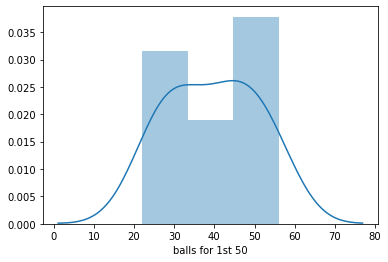

In [50]:
sns.distplot(SRH_runs["balls for 1st 50"])

Text(0.5, 1.0, "Ball's taken for 50")

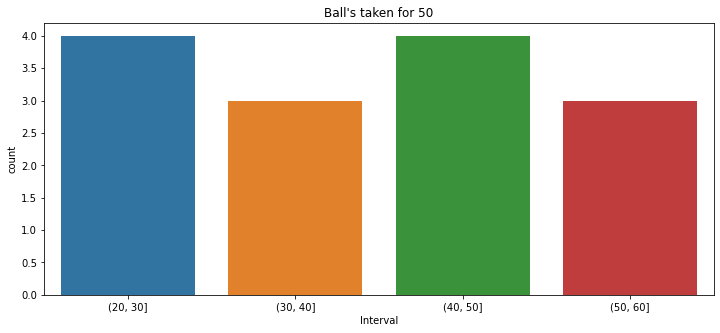

In [51]:
plt.figure(figsize=(12,5))
SRH_runs["Interval"] = pd.cut(SRH_runs["balls for 1st 50"],[20,30,40,50,60])
sns.countplot(SRH_runs["Interval"])
plt.title("Ball's taken for 50")

In [52]:
print("Average no of balls that SRH is expected to take for their 50 runs :{}".format(round(SRH_runs["balls for 1st 50"].mean())))

Average no of balls that SRH is expected to take for their 50 runs :39


Based on all the above analysis we can predict SRH to score 50 runs in 30+ balls.

## Gayle in first 10 balls

- Against SRH

In [53]:
gayle = KXIP_SRH[(KXIP_SRH["batting_team"]=="Kings XI Punjab")&(KXIP_SRH["batsman"]=="CH Gayle")]
gayle = gayle[gayle["wide_runs"]==0]

In [54]:
gayle.match_id.unique()

array([ 7909,  7918, 11313, 11339], dtype=int64)

In [55]:
gayle_runs = gayle.groupby(['match_id',"batsman"]).agg({"batsman_runs":"sum","ball":"count"})

gayle_runs.columns = ["Runs Scored","Ball faced"]

gayle_runs

,,Runs Scored,Ball faced
match_id,batsman,,
7909,CH Gayle,109,63
7918,CH Gayle,23,22
11313,CH Gayle,16,14
11339,CH Gayle,4,3


Runs Scored in First 10 balls :

In [56]:
bound = [1,2,3,4,6]
runs = []
boundary_runs = []
for value in gayle.groupby("match_id"):
    count = 1
    d = list(value[1]["batsman_runs"])
    print(d)
    runs.clear()
    for i in d:
        while(count<=10):
            count = count+1
            if i in bound:
                runs.append(i)
            break
    c = sum(runs)
    boundary_runs.append(c)
    

boundary_runs

[1, 0, 4, 0, 0, 2, 0, 0, 6, 4, 1, 0, 6, 0, 0, 6, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 6, 1, 1, 1, 1, 1, 0, 1, 0, 0, 6, 1, 1, 1, 6, 6, 6, 6, 2, 0, 1, 2, 2, 1, 1, 6, 1, 1, 1, 0, 6, 1, 1, 1, 0, 1, 1]
[0, 0, 1, 0, 6, 0, 1, 0, 1, 1, 0, 1, 0, 4, 0, 0, 6, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 4, 1, 1, 6, 0, 2, 0, 0, 1, 0]
[4, 0, 0]


[17, 10, 15, 4]

In [57]:
gayle_runs["runs in first 10 balls"] = boundary_runs

gayle_runs

,,Runs Scored,Ball faced,runs in first 10 balls
match_id,batsman,,,
7909,CH Gayle,109,63,17
7918,CH Gayle,23,22,10
11313,CH Gayle,16,14,15
11339,CH Gayle,4,3,4


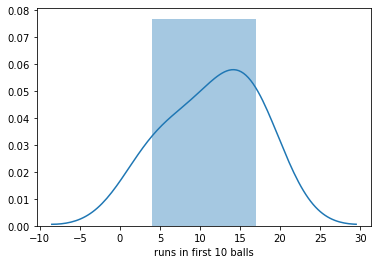

In [58]:
sns.distplot(gayle_runs["runs in first 10 balls"])

In [59]:
print("Average runs made by Gayle in first 10 balls against SRH :{}".format(round(gayle_runs["runs in first 10 balls"].mean())))

Average runs made by Gayle in first 10 balls against SRH :12


- Overall


In [60]:
gayle_overall = matches[(matches["bowling_team"]=="Sunrisers Hyderabad")&(matches["batsman"]=="CH Gayle")]
gayle_overall = gayle_overall[gayle_overall["wide_runs"]==0]

In [61]:
gayle_overall.match_id.nunique()

13

In [62]:
gayle_overall.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

In [63]:
gayle_runs_overall = gayle_overall.groupby(['match_id',"batsman"]).agg({"batsman_runs":"sum","ball":"count"})

gayle_runs_overall.columns = ["Runs Scored","Ball faced"]

gayle_runs_overall

,,Runs Scored,Ball faced
match_id,batsman,,
1,CH Gayle,32,21
388,CH Gayle,11,6
432,CH Gayle,13,15
481,CH Gayle,27,19
503,CH Gayle,14,20
525,CH Gayle,21,16
568,CH Gayle,35,10
580,CH Gayle,1,4
636,CH Gayle,76,38


Runs scored in first 10 balls :

In [64]:
bound = [1,2,3,4,6]
runs = []
boundary_runs = []
for value in gayle_overall.groupby("match_id"):
    count = 1
    d = list(value[1]["batsman_runs"])
    print(d)
    runs.clear()
    for i in d:
        while(count<=10):
            count = count+1
            if i in bound:
                runs.append(i)
            break
    c = sum(runs)
    boundary_runs.append(c)
    

boundary_runs

[1, 0, 0, 1, 0, 4, 1, 6, 6, 2, 0, 1, 0, 0, 0, 0, 0, 4, 0, 6, 0]
[1, 0, 2, 1, 6, 1]
[1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 2, 1, 0]
[1, 0, 0, 0, 4, 0, 0, 4, 0, 1, 0, 0, 0, 4, 6, 6, 0, 1, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0]
[1, 0, 6, 2, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0]
[4, 6, 1, 4, 4, 0, 6, 4, 6, 0]
[0, 1, 0, 0]
[0, 0, 0, 2, 6, 0, 2, 1, 0, 0, 4, 0, 1, 0, 6, 0, 0, 4, 6, 6, 4, 1, 0, 1, 6, 0, 1, 6, 0, 1, 0, 6, 6, 4, 0, 1, 1, 0]
[1, 0, 4, 0, 0, 2, 0, 0, 6, 4, 1, 0, 6, 0, 0, 6, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 6, 1, 1, 1, 1, 1, 0, 1, 0, 0, 6, 1, 1, 1, 6, 6, 6, 6, 2, 0, 1, 2, 2, 1, 1, 6, 1, 1, 1, 0, 6, 1, 1, 1, 0, 1, 1]
[0, 0, 1, 0, 6, 0, 1, 0, 1, 1, 0, 1, 0, 4, 0, 0, 6, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 4, 1, 1, 6, 0, 2, 0, 0, 1, 0]
[4, 0, 0]


[21, 11, 6, 10, 6, 13, 35, 1, 11, 17, 10, 15, 4]

In [65]:
gayle_runs_overall["runs in 10 balls"] = boundary_runs

gayle_runs_overall

,,Runs Scored,Ball faced,runs in 10 balls
match_id,batsman,,,
1,CH Gayle,32,21,21
388,CH Gayle,11,6,11
432,CH Gayle,13,15,6
481,CH Gayle,27,19,10
503,CH Gayle,14,20,6
525,CH Gayle,21,16,13
568,CH Gayle,35,10,35
580,CH Gayle,1,4,1
636,CH Gayle,76,38,11


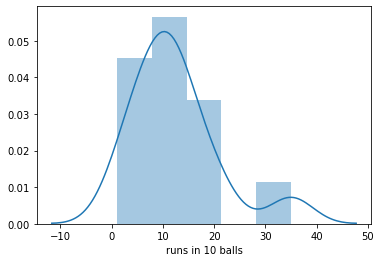

In [66]:
sns.distplot(gayle_runs_overall["runs in 10 balls"])

Text(0.5, 1.0, 'Runs scored in first 10 balls by Gayle')

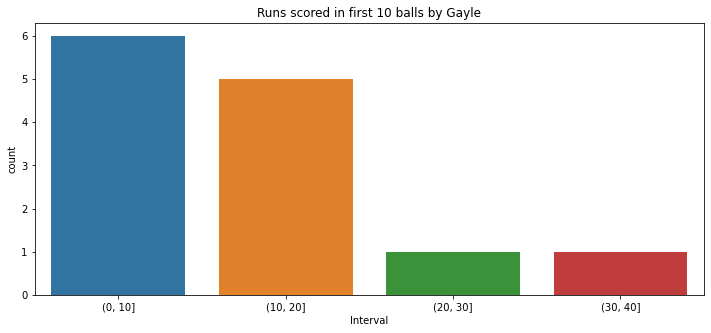

In [67]:
plt.figure(figsize=(12,5))
gayle_runs_overall["Interval"] = pd.cut(gayle_runs_overall["runs in 10 balls"],[0,10,20,30,40])
sns.countplot(gayle_runs_overall["Interval"])
plt.title("Runs scored in first 10 balls by Gayle")

In [68]:
print("Average runs made by Gayle in first 10 balls against SRH :{}".format(round(gayle_runs_overall["runs in 10 balls"].mean())))

Average runs made by Gayle in first 10 balls against SRH :12


## Confidence Interval

In [69]:
gayle_runs_overall.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
runs in 10 balls,13.0,12.307692,8.711913,1.0,6.0,11.0,15.0,35.0


In [70]:
mean = gayle_runs_overall["runs in 10 balls"].mean()
sd = gayle_runs_overall["runs in 10 balls"].std()
n = len(gayle_runs_overall)

n

13

In [71]:
tstar = 2.064
se = sd/np.sqrt(n)
se

2.4162500491055896

In [72]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the runs gayle is expected to score in first 10 balls he would play :{}".format((lcb, ucb)))

95% Confidence Interval for the runs gayle is expected to score in first 10 balls he would play :(7.0, 17.0)


So from all the above analysis we can predict that Gayle to score 10+ runs in first 10 balls of his batting. 